In [64]:
conda install -c conda-forge/label/cf202003 keras

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [66]:
import pandas as pd


In [67]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D,Convolution2D
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [68]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [69]:
X_train.shape

(60000, 28, 28)

In [70]:
X_test.shape

(10000, 28, 28)

In [71]:
import matplotlib.pyplot as plt

In [72]:
## data visualization

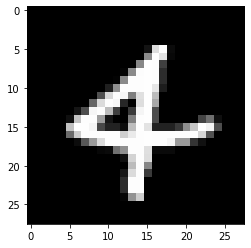

In [73]:
plt.imshow(X_train[150],cmap='gray')
plt.show()

In [74]:
y_train[150]

4

If we are using Tensorflow, the format should be (batch, height, width, channels). If we are using Theano, the format should be (batch, channels, height, width).

In [75]:
## reshapeing our data into format of(s,h,w,c)

X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

#feature scaling
X_train = X_train.astype('float')
X_test = X_test.astype('float')

X_train /=255
X_test /=255

we need to one-hot encode the labels i.e. Y_train and Y_test. 


Y_train[0] = [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.] since the label representated by it is 5.

In [76]:
## convert our data into one hot encoding form
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [77]:
y_train[:3]  #

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [78]:
model = Sequential()  #create an object for this seq. 

model.add(Conv2D(32,3,3,activation='relu',input_shape=(28,28,1)))  # first conv. layer
#no_filter,filter_size,a_f,input_shape

model.add(MaxPooling2D(2,2))   #max pooling layer

model.add(Conv2D(64,3,3,activation='relu'))   #second conv. layer

model.add(MaxPooling2D(2,2))    #max pooling layer

model.add(Dropout(0.25))     # dropout layer


model.add(Flatten())      

model.add(Dense(1000,activation='relu'))   #first hidden layer

model.add(Dropout(0.5))   ## dropout layer

model.add(Dense(10,activation='softmax'))  #output layer

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  


In [79]:
32*3*3+32

320

In [80]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1000)             

### Now we need to compile the model.

In [81]:
from keras.optimizers import Adam

In [82]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), 
              metrics=['accuracy'])

In [83]:
## data Aug.
##we generate random images with some manipulations

In [84]:
train_gen = ImageDataGenerator(shear_range=.2,
                               rotation_range=20,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               zoom_range=.2,
                               horizontal_flip=True)

test_gen = ImageDataGenerator() #validation data

In [85]:
train_generator = train_gen.flow(X_train, y_train, batch_size=64)
test_generator = test_gen.flow(X_test, y_test, batch_size=64)

Here we are using batch of 64, so the model will take 64 images at a time and train on them.

In [86]:
# 50 or 60

In [87]:
model.fit_generator(train_generator,steps_per_epoch=60000/64,
                    epochs=25,
                    validation_data=test_generator,
                    validation_steps=10000/64)

Epoch 1/25
938/937 [==============================] - 123s 131ms/step - loss: 0.9193 - accuracy: 0.6870 - val_loss: 0.1869 - val_accuracy: 0.9123
Epoch 2/25
938/937 [==============================] - 99s 106ms/step - loss: 0.4626 - accuracy: 0.8496 - val_loss: 0.0378 - val_accuracy: 0.9623
Epoch 3/25
938/937 [==============================] - 108s 115ms/step - loss: 0.3575 - accuracy: 0.8874 - val_loss: 0.0849 - val_accuracy: 0.9699
Epoch 4/25
938/937 [==============================] - 116s 124ms/step - loss: 0.3104 - accuracy: 0.9013 - val_loss: 0.0040 - val_accuracy: 0.9756
Epoch 5/25
938/937 [==============================] - 105s 112ms/step - loss: 0.2707 - accuracy: 0.9165 - val_loss: 0.0293 - val_accuracy: 0.9775
Epoch 6/25
938/937 [==============================] - 91s 97ms/step - loss: 0.2541 - accuracy: 0.9214 - val_loss: 0.0094 - val_accuracy: 0.9720
Epoch 7/25
938/937 [==============================] - 99s 106ms/step - loss: 0.2421 - accuracy: 0.9242 - val_loss: 0.1458 - val

In [88]:
train_gen1=ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                            height_shift_range=0.08, zoom_range=0.08,horizontal_flip=True)

test_gen1 = ImageDataGenerator()

In [89]:
train_generator1 = train_gen1.flow(X_train, y_train, batch_size=64)
test_generator1 = test_gen1.flow(X_test, y_test, batch_size=64)

In [90]:
model.fit_generator(train_generator1,steps_per_epoch=60000/64,epochs=25,validation_data=test_generator1,validation_steps=10000/64)

Epoch 1/25
938/937 [==============================] - 119s 127ms/step - loss: 0.0732 - accuracy: 0.9779 - val_loss: 0.0404 - val_accuracy: 0.9883
Epoch 2/25
938/937 [==============================] - 119s 127ms/step - loss: 0.0676 - accuracy: 0.9793 - val_loss: 0.0518 - val_accuracy: 0.9906
Epoch 3/25
938/937 [==============================] - 110s 117ms/step - loss: 0.0645 - accuracy: 0.9800 - val_loss: 0.0026 - val_accuracy: 0.9872
Epoch 4/25
938/937 [==============================] - 102s 109ms/step - loss: 0.0621 - accuracy: 0.9801 - val_loss: 0.2029 - val_accuracy: 0.9893
Epoch 5/25
938/937 [==============================] - 110s 117ms/step - loss: 0.0610 - accuracy: 0.9806 - val_loss: 0.0802 - val_accuracy: 0.9872
Epoch 6/25
938/937 [==============================] - 102s 109ms/step - loss: 0.0619 - accuracy: 0.9814 - val_loss: 3.3267e-06 - val_accuracy: 0.9901
Epoch 7/25
938/937 [==============================] - 132s 141ms/step - loss: 0.0588 - accuracy: 0.9819 - val_loss: 2.34

In [91]:
#ghk

In [92]:
model.save_weights()

TypeError: save_wrapper() missing 1 required positional argument: 'filepath'

In [ ]:
model.save('mnist_cnn1.h5')  

In [ ]:
from keras.models import load_model

In [ ]:
loaded_model = load_model('mnist_cnn1.h5')
#loaded_model = load_model('mnist_cnn.h5')

In [ ]:
score = model.evaluate(X_test, y_test)
print()
print('Test accuracy: ', score[1])

In [ ]:
score = loaded_model.evaluate(X_test, y_test)
print()
print('Test accuracy: ', score[1])

In [ ]:
pip install opencv-python

In [ ]:
import cv2    #  
import matplotlib.pyplot as plt

img = cv2.imread('2test.png')   #read the image ,0-gray scale

In [ ]:
img.shape  # will be array

In [ ]:
plt.imshow(img,cmap='gray')
#plt.axis('off')

In [ ]:
img = np.invert(img)  #

In [ ]:
plt.imshow(img,cmap='gray')

In [ ]:
img = cv2.resize(img, (28, 28))   #

In [ ]:
img.shape

In [ ]:
plt.imshow(img,cmap='gray')

In [ ]:
#cv2.imwrite(img,'sample.png')  #write

In [ ]:
type(img)

In [ ]:
img.max()

In [ ]:
img = img/255

In [ ]:
img.shape

In [ ]:
img = img.reshape(-1,28,28,1)

In [ ]:
model.predict_classes(img)

In [ ]:
loaded_model.predict_classes(img)